In [158]:
import pandas as pd
# import seaborn as sns
import numpy as np
# import matplotlib.pyplot as plt



In [182]:
file_path = 'data.csv'

data = pd.read_csv(file_path)

data["sex"].replace(['male', 'female'], [0, 1], inplace=True)
data["smoker"].replace(['no', 'yes'], [0, 1],  inplace=True)
# data_model = data.drop("region", axis=1)
# print(data_model)

region_dummies = pd.get_dummies(data['region'], prefix='is', prefix_sep='_')

# Concaténer les colonnes binaires avec le DataFrame original
data = pd.concat([data, region_dummies], axis=1)

# Supprimer la colonne 'region' si nécessaire
data.drop('region', axis=1, inplace=True)

# Afficher le DataFrame avec les nouvelles colonnes binaires
print(data.head())





   age  sex     bmi  children  smoker      charges  is_northeast  \
0   19    1  27.900         0       1  16884.92400             0   
1   18    0  33.770         1       0   1725.55230             0   
2   28    0  33.000         3       0   4449.46200             0   
3   33    0  22.705         0       0  21984.47061             0   
4   32    0  28.880         0       0   3866.85520             0   

   is_northwest  is_southeast  is_southwest  
0             0             0             1  
1             0             1             0  
2             0             1             0  
3             1             0             0  
4             1             0             0  


In [171]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


data_model.dropna(axis=0, inplace=True)
# model = KNeighborsClassifier()
target = data_model['charges']

X = data_model.drop('charges', axis=1)
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 80% pour train et 20% de test

# Initialisation du modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Coût: {mse}")
print(f"R-squared: {r2}")


Coût: 33979257.05080821
R-squared: 0.7811302113434095


IHM :

age


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


<Figure size 600x400 with 0 Axes>

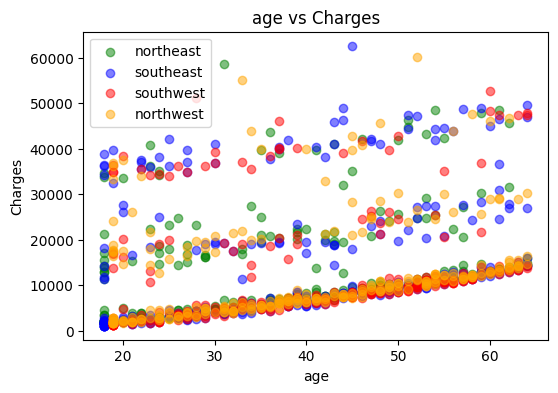

sex


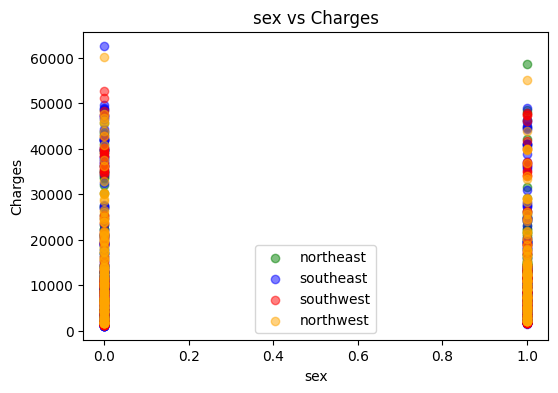

bmi


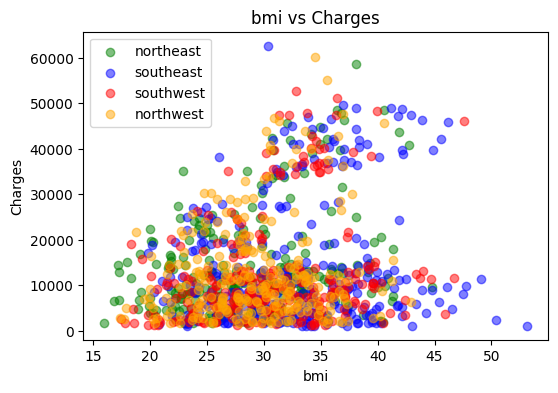

children


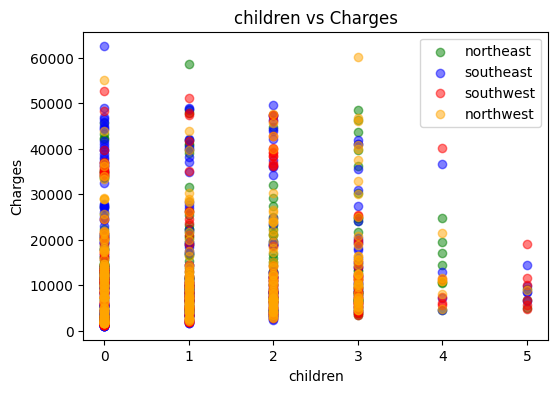

smoker


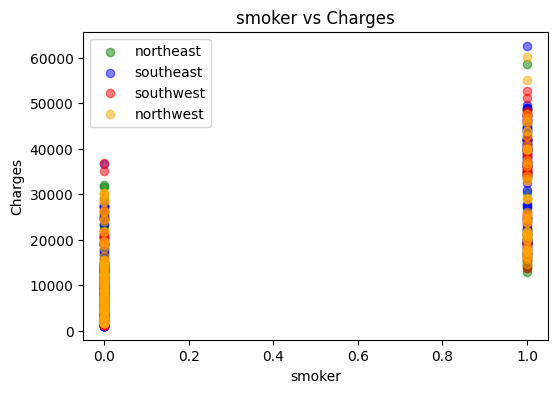

In [176]:
import matplotlib.pyplot as plt

# Supposons que X et y sont déjà définis

# Ajouter une colonne "color" pour la couleur associée à chaque région
colors = {'northeast': 'green', 'southeast': 'blue', 'southwest': 'red', 'northwest': 'orange'}
data['color'] = data['region'].map(colors)

# Obtenir les noms des colonnes de X
feature_names = X_train.columns

# Créer des nuages de points pour chaque colonne de X par rapport à y avec couleurs par région
for feature in feature_names:
    print(feature)
    plt.figure(figsize=(6, 4))
    for region, color in colors.items():
        plt.scatter(X_train[data['region'] == region][feature], y_train[data['region'] == region], label=region, color=color, alpha=0.5)
    plt.title(f'{feature} vs Charges')
    plt.xlabel(feature)
    plt.ylabel('Charges')
    plt.legend()
    plt.show()